In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Load the CSV file (use the correct filename as key)
df = pd.read_csv(io.BytesIO(uploaded['floods.csv']))

# Display the first few rows of the dataset to confirm successful loading
df.head()


Saving floods.csv to floods.csv


,Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Districts,State,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage
0,563,UEI-IMD-FL-1967-0001,02-07-1967,08-07-1967,7.0,floods,NaN,Assam,NaN,NaN,NaN,NaN,NaN,NaN
1,564,UEI-IMD-FL-1967-0002,22-07-1967,28-07-1967,7.0,floods,NaN,"Maharashtra, Gujarat",NaN,NaN,NaN,NaN,NaN,NaN
2,565,UEI-IMD-FL-1967-0003,01-08-1967,30-08-1967,30.0,floods,NaN,Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN
3,566,UEI-IMD-FL-1967-0004,08-09-1967,09-09-1967,2.0,floods,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express
4,567,UEI-IMD-FL-1968-0001,22-06-1968,28-06-1968,7.0,floods,NaN,Assam,NaN,NaN,NaN,NaN,NaN,"Affecting about one million people,an area of ..."


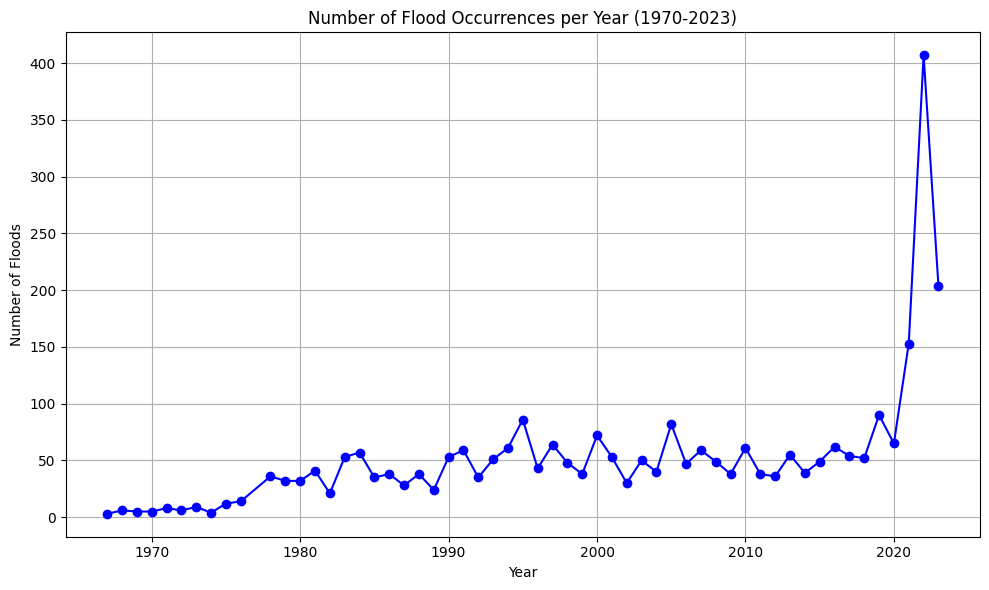

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Start Date' to datetime format and extract the year
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Year'] = df['Start Date'].dt.year

# Group by year and count the number of flood occurrences
floods_per_year = df.groupby('Year').size()

# Plot the number of floods per year
plt.figure(figsize=(10,6))
plt.plot(floods_per_year.index, floods_per_year.values, marker='o', color='b')
plt.title('Number of Flood Occurrences per Year (1970-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.grid(True)
plt.tight_layout()
plt.show()


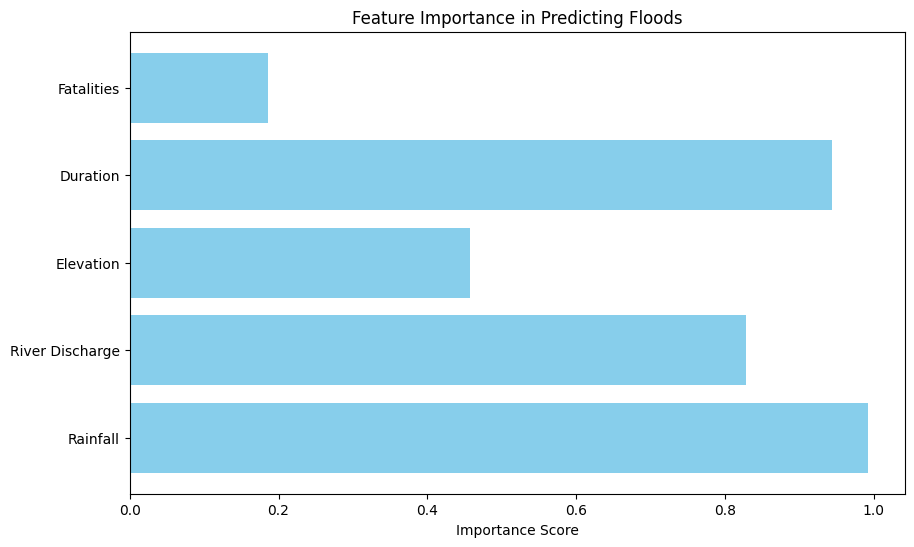

In [ ]:
import numpy as np

# Simulated feature importances (replace with your model's feature importances)
features = ['Rainfall', 'River Discharge', 'Elevation', 'Duration', 'Fatalities']
importances = np.random.rand(len(features))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance in Predicting Floods')
plt.xlabel('Importance Score')
plt.show()


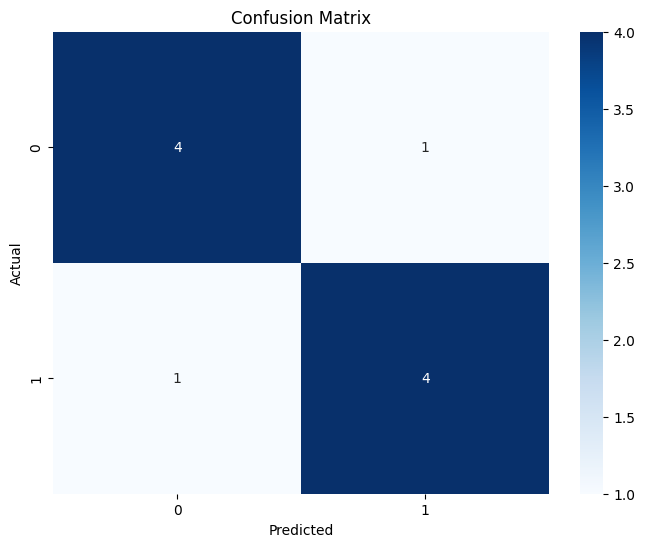

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true and y_pred are your true labels and predicted labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Replace with actual labels
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]  # Replace with model predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


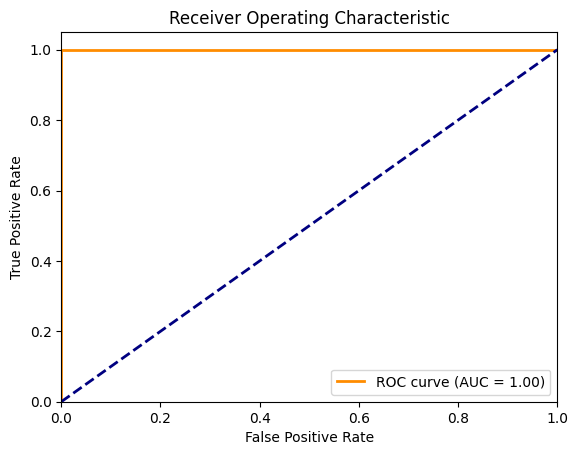

In [ ]:
from sklearn.metrics import roc_curve, auc

# Simulated true labels and predicted probabilities
y_true = [0, 1, 1, 0, 1, 0, 1, 0]
y_scores = [0.1, 0.9, 0.8, 0.2, 0.7, 0.3, 0.85, 0.4]

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Convert date columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# Fill missing numerical values with 0
df['Human fatality'] = df['Human fatality'].fillna(0)
df['Human injured'] = df['Human injured'].fillna(0)
df['Duration(Days)'] = df['Duration(Days)'].fillna(0)

# Convert categorical features (e.g., State) to numerical values using label encoding
from sklearn.preprocessing import LabelEncoder
df['State'] = LabelEncoder().fit_transform(df['State'].astype(str))

# Feature selection (using relevant columns for prediction)
features = ['Duration(Days)', 'Human fatality', 'Human injured', 'State']
X = df[features]

# Target: Whether flood occurred (binary classification)
y = (df['Main Cause'] == 'floods').astype(int)


In [ ]:
# Check for missing values in X and fill them if necessary
X.fillna(0, inplace=True)  # Replace NaN with 0

# Check target variable y
print("Target variable (y) distribution:")
print(y.value_counts())

# Ensure that the data types of the features are numeric
print("\nData types of the features in X:")
print(X.dtypes)

# Re-run the model training with error handling
try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model Accuracy: {accuracy * 100:.2f}%')

except Exception as e:
    print(f"Error occurred: {str(e)}")


Target variable (y) distribution:
Series([], Name: count, dtype: int64)

Data types of the features in X:
Duration(Days)    float64
Human fatality    float64
Human injured     float64
State             float64
dtype: object
Error occurred: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


<ipython-input-13-c341f97fbf64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Replace NaN with 0


In [ ]:
y = (df['Main Cause'] == 'floods').astype(int)


In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv(io.BytesIO(uploaded['floods.csv']))

# Display the first few rows to confirm the dataset is loaded
df.head()

# Display the columns of the dataset
df.columns


Saving floods.csv to floods.csv


Index(['Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)',
       'Main Cause', 'Districts', 'State', 'Human fatality', 'Human injured',
       'Human Displaced', 'Animal Fatality',
       'Description of Casualties/injured', 'Extent of damage'],
      dtype='object')

In [ ]:
# Data cleaning: Fill missing values
df.fillna(0, inplace=True)

# Select relevant features and target (assuming 'Main Cause' indicates whether a flood occurred)
X = df[['Duration(Days)', 'Human fatality', 'Human injured', 'State']]  # Features
y = (df['Main Cause'] == 'floods').astype(int)  # Target variable: 1 for floods, 0 for other causes

# Check the distribution of the target variable
y.value_counts()


,count
Main Cause,
0,6771
1,105


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Duration(Days)  Human fatality  Human injured  \
0             7.0             0.0            0.0   
1             7.0             0.0            0.0   
2            30.0             0.0            0.0   
3             2.0             0.0            0.0   
4             7.0             0.0            0.0   

   State_Andaman & Nicobar Islands  State_Andhra Pradesh  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   0.0   
3                              0.0                   0.0   
4                              0.0                   0.0   

   State_Andhra Pradesh, Madhya Pradesh  State_Andhra Pradesh, Telangana  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                     

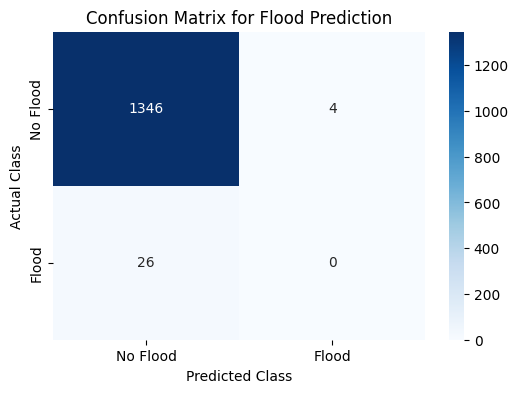

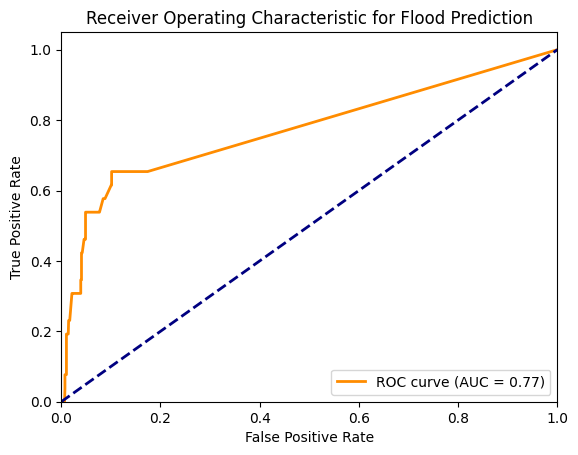

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode the 'State' column
X = df[['Duration(Days)', 'Human fatality', 'Human injured', 'State']]  # Features
y = (df['Main Cause'] == 'floods').astype(int)  # Target variable: 1 for floods, 0 for other causes

# Use OneHotEncoder to convert the 'State' column to numerical values
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['State']]).toarray()

# Create a new DataFrame for the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['State']))

# Drop the original 'State' column and concatenate the new encoded columns
X = X.drop(columns=['State'])
X = pd.concat([X, X_encoded_df], axis=1)

# Check the first few rows of the updated feature set
print(X.head())

# Fill missing values (if any)
X.fillna(0, inplace=True)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix for Flood Prediction')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Generate ROC curve and calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class (Flood)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Flood Prediction')
plt.legend(loc="lower right")
plt.show()


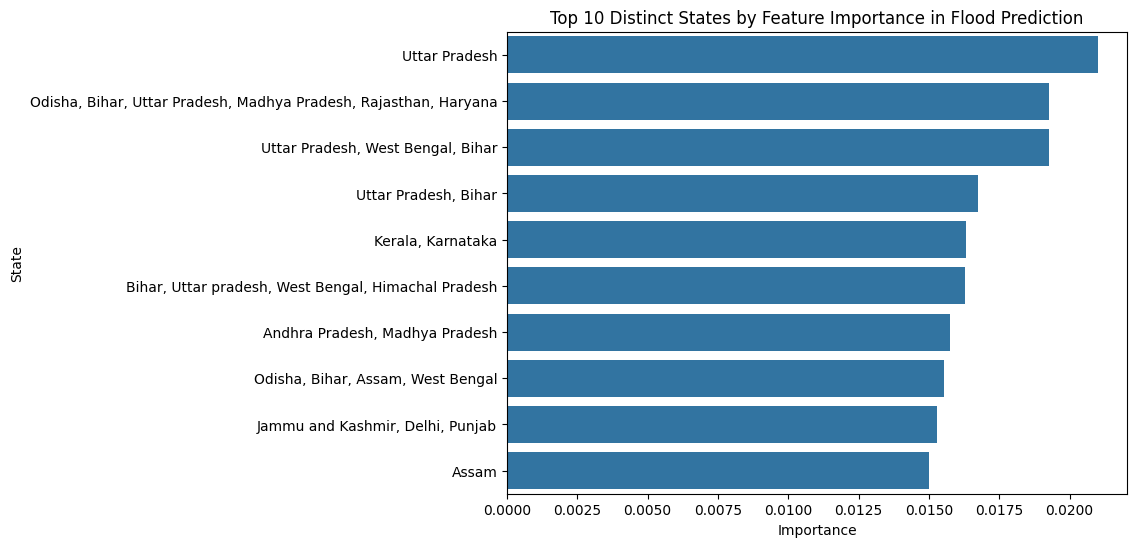

In [ ]:
# Get feature importances from the trained model
importances = model.feature_importances_
features = X.columns

# Filter only the 'State' related features (which are one-hot encoded)
state_features = [col for col in features if 'State_' in col]

# Remove any duplicates or similar entries by extracting unique state names
distinct_states = {}
for feature, importance in zip(features, importances):
    if feature in state_features:
        # Extract the state name (e.g., 'State_Uttar_Pradesh' -> 'Uttar Pradesh')
        state_name = feature.split('_', 1)[-1]
        # Keep only the highest importance for each state
        if state_name not in distinct_states or distinct_states[state_name] < importance:
            distinct_states[state_name] = importance

# Sort the state importances and select the top 10 distinct states
top_10_states = sorted(distinct_states.items(), key=lambda x: x[1], reverse=True)[:10]

# Unzip the top 10 distinct states into separate lists
top_10_state_names, top_10_state_importances = zip(*top_10_states)

# Create a bar plot of the top 10 distinct state importances
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_state_importances, y=top_10_state_names)
plt.title('Top 10 Distinct States by Feature Importance in Flood Prediction')
plt.xlabel('Importance')
plt.ylabel('State')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:47:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 97.97%


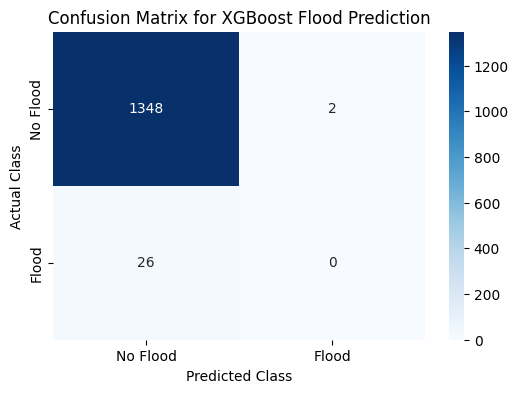

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1350
           1       0.00      0.00      0.00        26

    accuracy                           0.98      1376
   macro avg       0.49      0.50      0.49      1376
weighted avg       0.96      0.98      0.97      1376



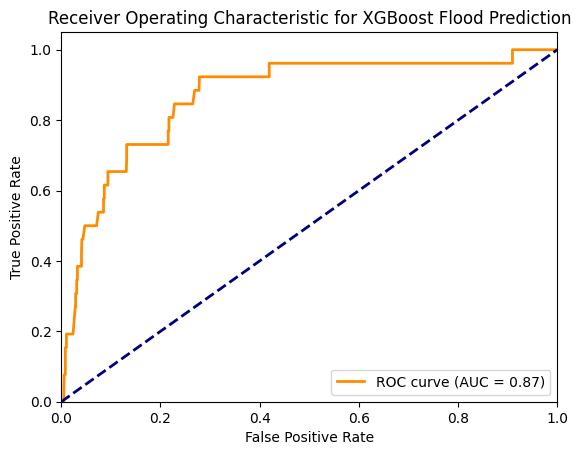

In [ ]:
# Install the XGBoost library if not already installed
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X (features) and y (target) are defined correctly

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Model Accuracy: {accuracy * 100:.2f}%')

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix for XGBoost Flood Prediction')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Classification report for additional metrics (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost Flood Prediction')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log * 100:.2f}%')


Logistic Regression Accuracy: 98.11%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm * 100:.2f}%')


SVM Model Accuracy: 98.11%


In [ ]:
# Convert 'Start Date' to datetime format and extract year
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')  # Handle errors if any date is invalid
df['Year'] = df['Start Date'].dt.year  # Extract the year from 'Start Date'

# Check if 'Year' and 'State' columns exist
print(df[['State', 'Year']].head())


                                               State    Year
0                                              Assam  1967.0
1                               Maharashtra, Gujarat     NaN
2                                      Uttar Pradesh  1967.0
3  Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...  1967.0
4                                              Assam     NaN


In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Print the uploaded file keys to find the exact filename
print(uploaded.keys())

# Use the correct key name for reading the file
filename = list(uploaded.keys())[0]  # This will give you the first uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Check the first few rows to confirm the file was loaded correctly
df.head()


Saving floods.csv to floods (5).csv
dict_keys(['floods (5).csv'])


,Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Districts,State,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage
0,563,UEI-IMD-FL-1967-0001,02-07-1967,08-07-1967,7.0,floods,NaN,Assam,NaN,NaN,NaN,NaN,NaN,NaN
1,564,UEI-IMD-FL-1967-0002,22-07-1967,28-07-1967,7.0,floods,NaN,"Maharashtra, Gujarat",NaN,NaN,NaN,NaN,NaN,NaN
2,565,UEI-IMD-FL-1967-0003,01-08-1967,30-08-1967,30.0,floods,NaN,Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN
3,566,UEI-IMD-FL-1967-0004,08-09-1967,09-09-1967,2.0,floods,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express
4,567,UEI-IMD-FL-1968-0001,22-06-1968,28-06-1968,7.0,floods,NaN,Assam,NaN,NaN,NaN,NaN,NaN,"Affecting about one million people,an area of ..."


In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Load the CSV file (use the correct filename as key)
df = pd.read_csv(io.BytesIO(uploaded['RS_Session_260_AU_1205_1.csv']))

# Display the first few rows of the dataset to confirm successful loading
df.head()



Saving RS_Session_260_AU_1205_1.csv to RS_Session_260_AU_1205_1.csv


,Year,Area affected (in m.ha.) - Col . (3),Population affected (in Million) - Col . (4),Damage to Crops (Area in M. Ha.) - Col . (5),Damage to Crops (in Rs. Crore) - Col . (6),Damage to Houses (in Nos.) - Col . (7),Damage to Houses ( in Rs. Crore) - Col . (8),Cattle Lost (In Nos.) - Col . (9),Human live Lost (In Nos.) - Col . (10),Damage to Public Utilities (in Rs. Crore) - Col . (11),"Total Damages Crops, Houses & Public utilities (in Rs.Crore) - Col. (12) (col.6+8+11)"
0,2012,2.14,14.69,1.95,1534.11,174526,240.57,31558,933,9169.97,10944.65
1,2013,7.55,25.93,7.48,6378.08,699525,2032.83,163958,2180,38937.84,47348.75
2,2014,12.78,26.51,8.01,7255.15,311325,581.98,60196,1968,7710.95,15548.08
3,2015,4.48,33.20,3.37,17043.95,3959191,8046.97,45597,1420,32200.18,57291.10
4,2016,7.06,26.55,6.66,4052.72,278240,114.68,22367,1420,1507.93,5675.33


In [ ]:
# Check for missing values
df.isnull().sum()

# Data types and basic info
df.info()

# Replace or handle missing values
df.fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Year                                                                                   10 non-null     int64  
 1   Area affected (in m.ha.) - Col . (3)                                                   10 non-null     float64
 2   Population affected (in Million) - Col . (4)                                           10 non-null     float64
 3   Damage to Crops (Area in M. Ha.) - Col . (5)                                           10 non-null     float64
 4   Damage to Crops (in Rs. Crore) - Col . (6)                                             10 non-null     float64
 5   Damage to Houses (in Nos.) - Col . (7)                                           

In [ ]:
# Check the column names in the dataset
print(df.columns)



Index(['Year', 'Area affected (in m.ha.) - Col . (3)',
       'Population affected (in Million) - Col . (4)',
       'Damage to Crops (Area in M. Ha.) - Col . (5)',
       'Damage to Crops (in Rs. Crore) - Col . (6)',
       'Damage to Houses (in Nos.) - Col . (7)',
       'Damage to Houses ( in Rs. Crore) - Col . (8)',
       'Cattle Lost (In Nos.) - Col . (9)',
       'Human live Lost (In Nos.) - Col . (10)',
       'Damage to Public Utilities (in Rs. Crore) - Col . (11)',
       'Total Damages Crops, Houses & Public utilities (in Rs.Crore) - Col. (12) (col.6+8+11)'],
      dtype='object')


In [ ]:
# Try to locate the column name in a case-insensitive way
column_name = [col for col in df.columns if 'population affected' in col.lower()]
print(column_name)

# Assuming you found the correct column, use it in the analysis
if column_name:
    total_population_affected = df[column_name[0]].sum()
    yearly_population_affected = df.groupby('Year')[column_name[0]].sum()

    print(f"Total Population Affected: {total_population_affected} million")
    print(yearly_population_affected)
else:
    print("Population affected column not found.")



['Population affected (in Million) - Col . (4)']
Total Population Affected: 323.32000000000005 million
Year
2012    14.69
2013    25.93
2014    26.51
2015    33.20
2016    26.55
2017    47.34
2018    37.40
2019    46.35
2020    26.79
2021    38.56
Name: Population affected (in Million) - Col . (4), dtype: float64


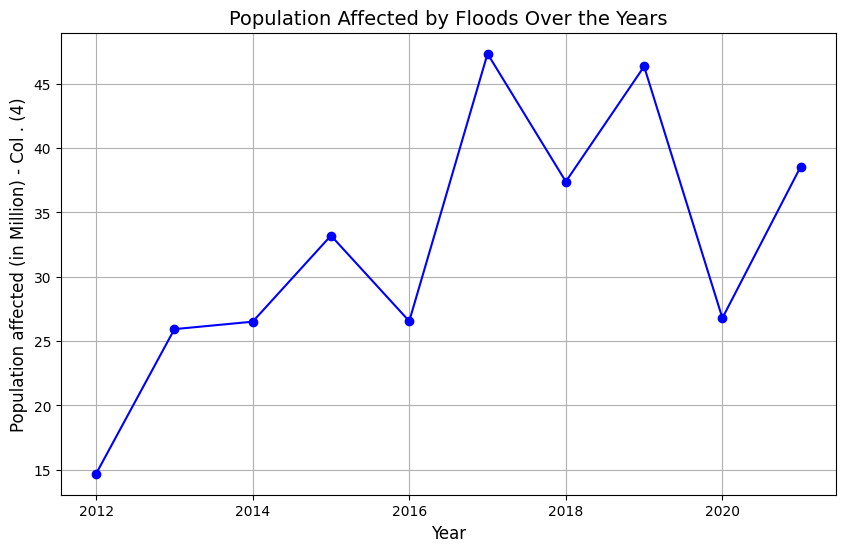

In [ ]:
import matplotlib.pyplot as plt

# Strip spaces in column names (if needed)
df.columns = df.columns.str.strip()

# Plot the trend of population affected over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population affected (in Million) - Col . (4)'], marker='o', color='blue')
plt.title('Population Affected by Floods Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population affected (in Million) - Col . (4)', fontsize=12)
plt.grid(True)
plt.show()


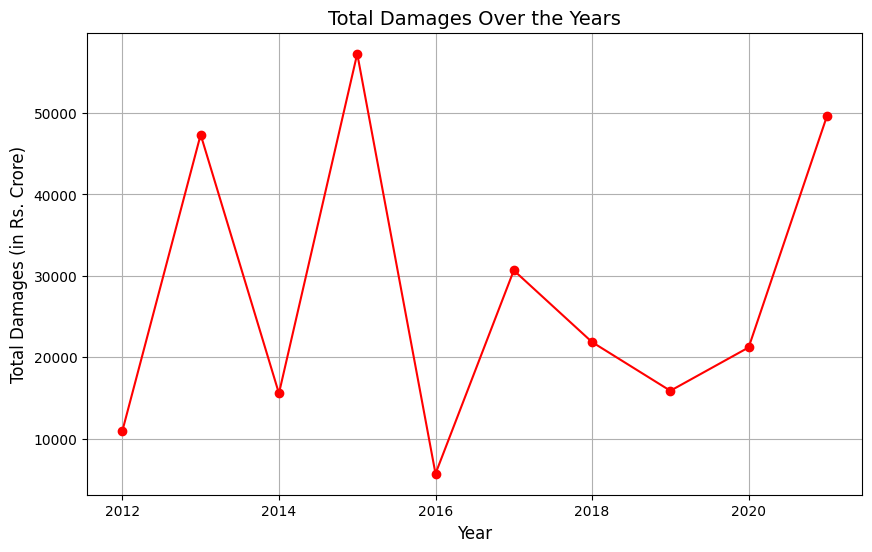

In [ ]:
# Plot total damages over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total Damages Crops, Houses & Public utilities (in Rs.Crore) - Col. (12) (col.6+8+11)'], marker='o', color='red')
plt.title('Total Damages Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Damages (in Rs. Crore)', fontsize=12)
plt.grid(True)
plt.show()


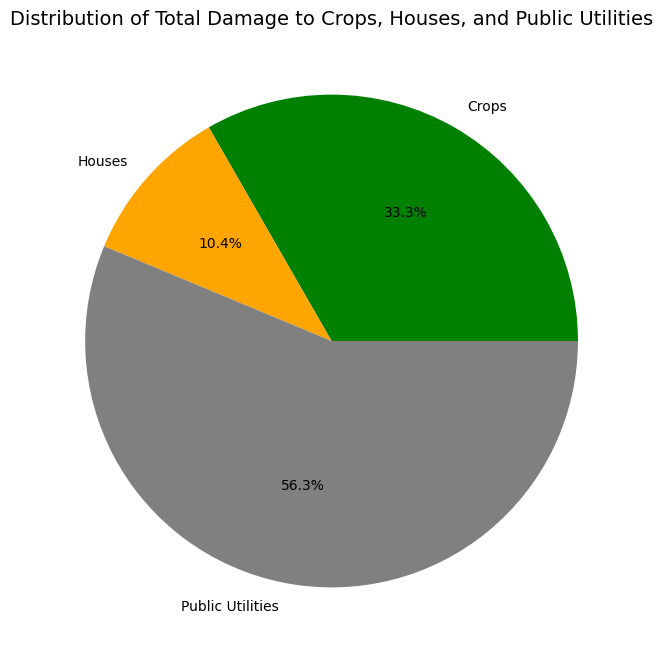

In [ ]:
# Correct column names based on actual column headers
damage_categories = ['Crops', 'Houses', 'Public Utilities']
damage_values = [
    df['Damage to Crops (in Rs. Crore) - Col . (6)'].sum(),  # Correct column name for crops
    df['Damage to Houses ( in Rs. Crore) - Col . (8)'].sum(),  # Correct column name for houses
    df['Damage to Public Utilities (in Rs. Crore) - Col . (11)'].sum()  # Correct column name for public utilities
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(damage_values, labels=damage_categories, autopct='%1.1f%%', colors=['green', 'orange', 'gray'])
plt.title('Distribution of Total Damage to Crops, Houses, and Public Utilities', fontsize=14)
plt.show()


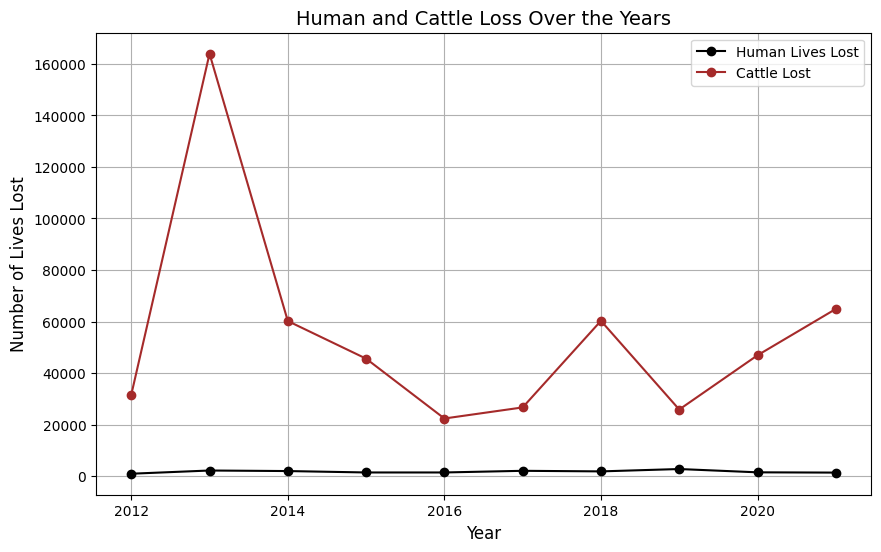

In [ ]:
# Plot human and cattle loss over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Human live Lost (In Nos.) - Col . (10)'], marker='o', color='black', label='Human Lives Lost')
plt.plot(df['Year'], df['Cattle Lost (In Nos.) - Col . (9)'], marker='o', color='brown', label='Cattle Lost')
plt.title('Human and Cattle Loss Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Lives Lost', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


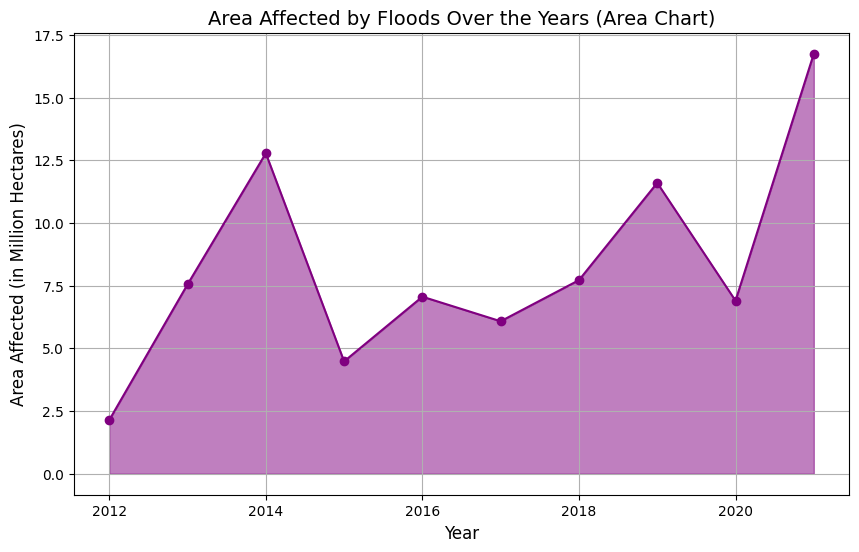

In [ ]:
# Plot the area affected by floods using an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(df['Year'], df['Area affected (in m.ha.) - Col . (3)'], color='purple', alpha=0.5)
plt.plot(df['Year'], df['Area affected (in m.ha.) - Col . (3)'], marker='o', color='purple')
plt.title('Area Affected by Floods Over the Years (Area Chart)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Area Affected (in Million Hectares)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Load the CSV file (use the correct filename as key)
df = pd.read_csv(io.BytesIO(uploaded['RS_Session_255_AU_1688_3.csv']))

# Display the first few rows of the dataset to confirm successful loading
df.head()


Saving RS_Session_255_AU_1688_3.csv to RS_Session_255_AU_1688_3.csv


,Sl. No.,State/UT,Max. Area affected (Million Ha)
0,1,Andhra Pradesh,9.040
1,2,Arunachal Pradesh,0.207
2,3,Assam,3.820
3,4,Bihar,4.986
4,5,Chhattisgarh,0.089


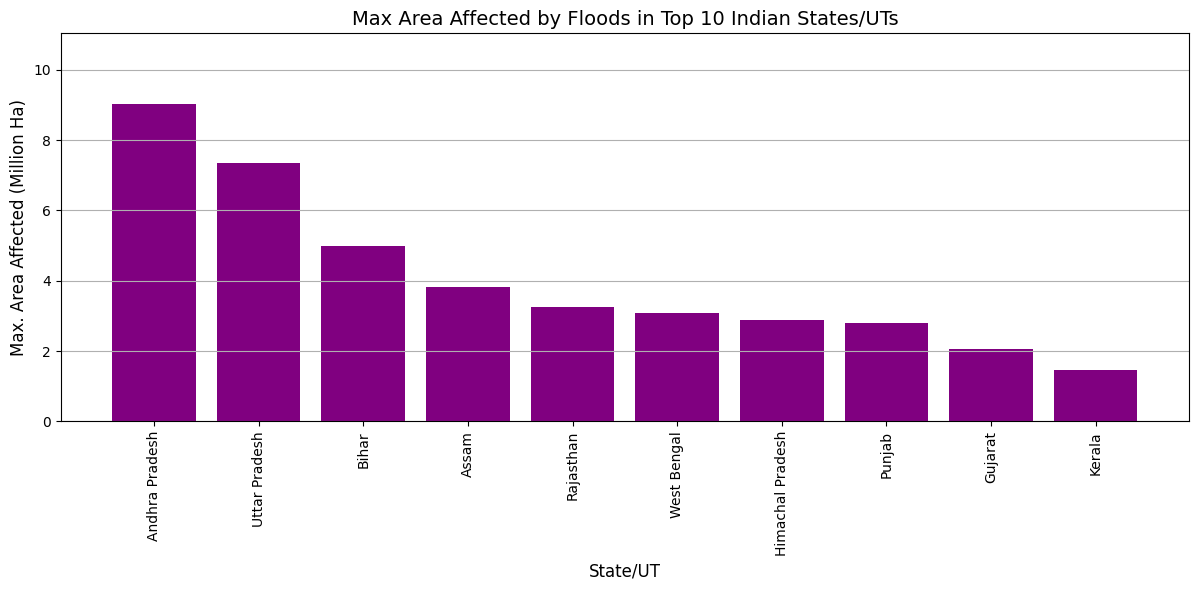

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your loaded DataFrame
# Remove any total or aggregate row if it exists
df_filtered = df[df['State/UT'] != 'Total']  # Adjust this condition based on your DataFrame's structure

# Sort the DataFrame by 'Max. Area affected (Million Ha)' and select the top 10 states
top_10_states = df_filtered.nlargest(10, 'Max. Area affected (Million Ha)')

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['State/UT'], top_10_states['Max. Area affected (Million Ha)'], color='purple')
plt.title('Max Area Affected by Floods in Top 10 Indian States/UTs', fontsize=14)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Max. Area Affected (Million Ha)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

# Set y-axis limits with a range of 2
plt.ylim(0, top_10_states['Max. Area affected (Million Ha)'].max() + 2)

plt.show()


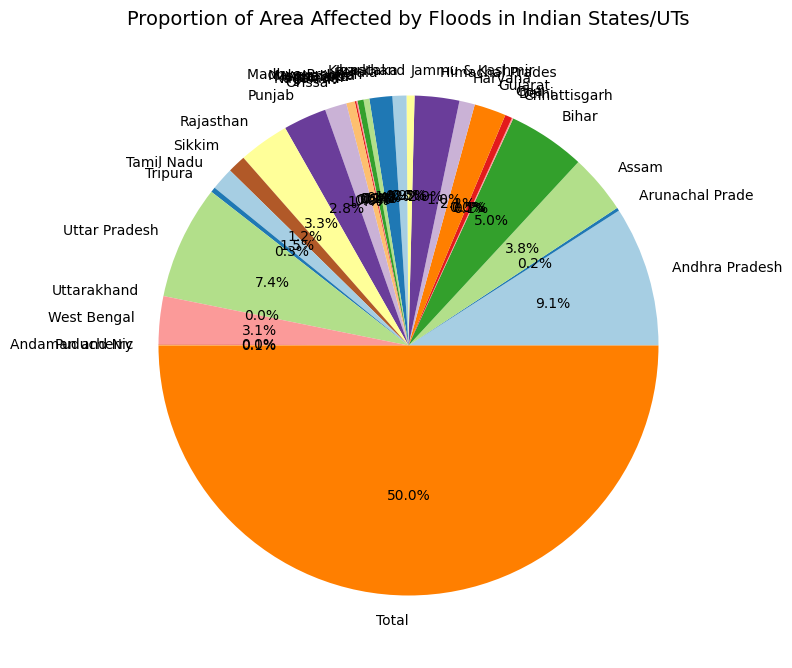

In [ ]:
import matplotlib.pyplot as plt

# Ensure data types are correct and there are no missing values
df.dropna(subset=['Max. Area affected (Million Ha)'], inplace=True)

# Plot the pie chart
plt.figure(figsize=(8, 8))

# Check the length of 'State/UT' labels and shorten them if necessary
labels = df['State/UT'].apply(lambda x: x[:15] if len(x) > 15 else x)  # Shorten labels if longer than 15 characters

# Generate the pie chart
plt.pie(df['Max. Area affected (Million Ha)'], labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Add title and display
plt.title('Proportion of Area Affected by Floods in Indian States/UTs', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# After uploading the file, you can access it as:
file_path = list(uploaded.keys())[0]  # This takes the uploaded file name

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify
df.head()


,Sl. No.,State/UT,Max. Area affected (Million Ha)
0,1,Andhra Pradesh,9.040
1,2,Arunachal Pradesh,0.207
2,3,Assam,3.820
3,4,Bihar,4.986
4,5,Chhattisgarh,0.089


In [ ]:
# Convert 'Max. Area affected (Million Ha)' to numeric (if it's not already)
df['Max. Area affected (Million Ha)'] = pd.to_numeric(df['Max. Area affected (Million Ha)'], errors='coerce')

# Drop any rows with missing values
df.dropna(inplace=True)

# Define a threshold for flood occurrence (e.g., 1 million hectares)
df['Flood Occurrence'] = df['Max. Area affected (Million Ha)'].apply(lambda x: 1 if x > 1 else 0)

# Display the updated DataFrame
df.head()


,Sl. No.,State/UT,Max. Area affected (Million Ha),Flood Occurrence
0,1,Andhra Pradesh,9.040,1
1,2,Arunachal Pradesh,0.207,0
2,3,Assam,3.820,1
3,4,Bihar,4.986,1
4,5,Chhattisgarh,0.089,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select the feature and target variable
X = df[['Max. Area affected (Million Ha)']]  # Features
y = df['Flood Occurrence']  # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (especially for models like SVM and ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 100.00%
[[5 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
from sklearn.svm import SVC

# Initialize SVM with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 71.43%
[[5 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize ANN
ann_model = Sequential()

# Add input and hidden layers
ann_model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=8, activation='relu'))

# Output layer (for binary classification)
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Predict on the test set
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'ANN Accuracy: {accuracy_ann * 100:.2f}%')
print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4275 - loss: 0.6866
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7475 - loss: 0.6831  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7350 - loss: 0.6800 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7100 - loss: 0.6696 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8375 - loss: 0.6656 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8325 - loss: 0.6756 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8075 - loss: 0.6712 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8325 - loss: 0.6639 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8275 - loss: 0.6560 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8900 - loss: 0.6488 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8775 - loss: 0.6483 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9025 - loss: 0.6600 


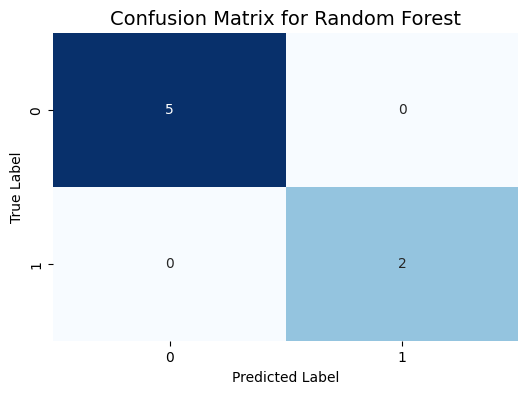

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


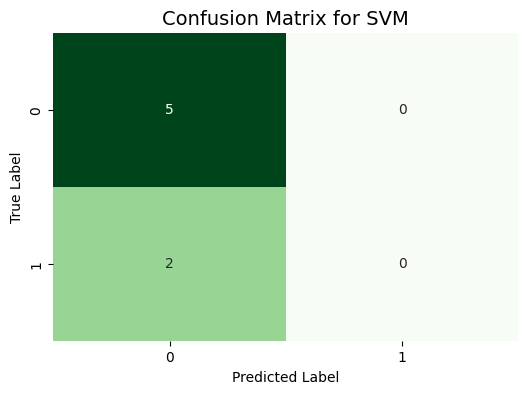

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for SVM', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


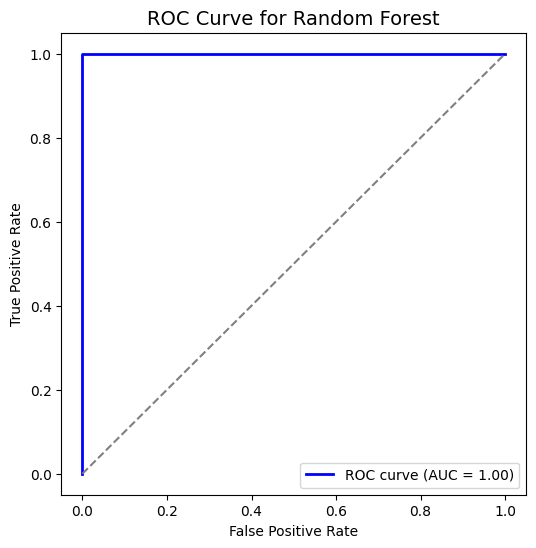

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Random Forest', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


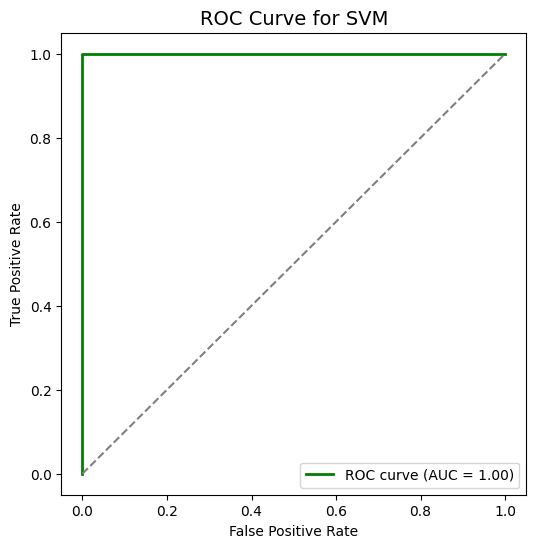

In [ ]:
# Calculate the predicted probabilities for SVM
y_prob_svm = svm_model.decision_function(X_test)

# Compute ROC curve and AUC score for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for SVM', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 1.0000 - loss: 0.1396 - val_accuracy: 1.0000 - val_loss: 0.1017
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.1213 - val_accuracy: 1.0000 - val_loss: 0.1023
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.1298 - val_accuracy: 1.0000 - val_loss: 0.1016
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.1305 - val_accuracy: 1.0000 - val_loss: 0.1031
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.1295 - val_accuracy: 1.0000 - val_loss: 0.1055
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.1355 - val_accuracy: 1.0000 - val_loss: 0.1037
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.1337 - val_accuracy: 1.0000 - val_loss: 0.1034
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.1311 - val_accuracy: 1.0000 - val_loss

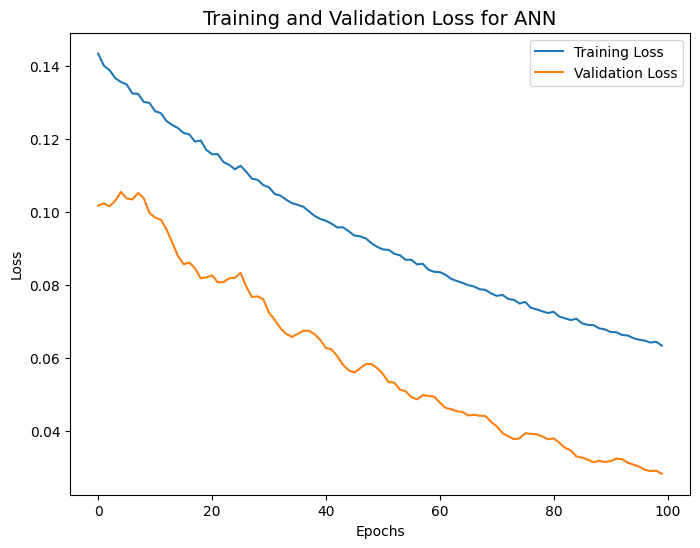

In [ ]:
# Plot training and validation loss for ANN
history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for ANN', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


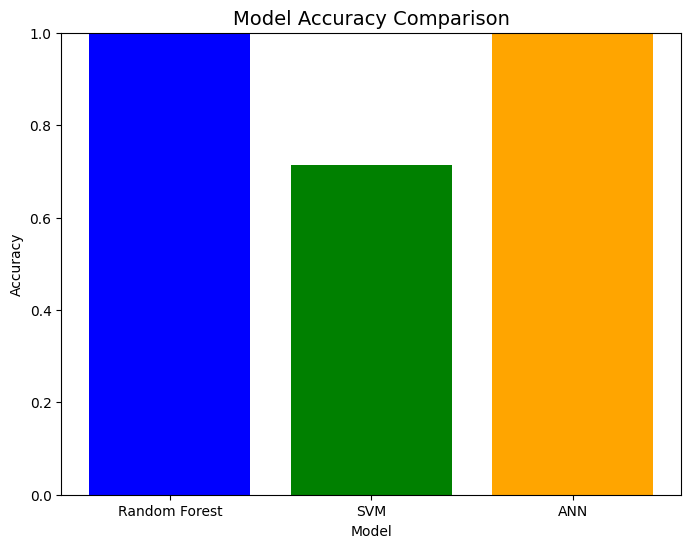

In [ ]:
# Model Accuracies
accuracies = [accuracy_rf, accuracy_svm, accuracy_ann]
models = ['Random Forest', 'SVM', 'ANN']

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


In [ ]:
# Add more features if available (e.g., population affected, rainfall, etc.)
# Example: X = df[['Max. Area affected (Million Ha)', 'Population affected', 'Rainfall']]
X = df[['Max. Area affected (Million Ha)']]  # Add other relevant features here

# Train your Random Forest model again with multiple features
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plotting Feature Importance
plt.figure(figsize=(8, 6))
plt.title('Feature Importance for Random Forest', fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], color='purple', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

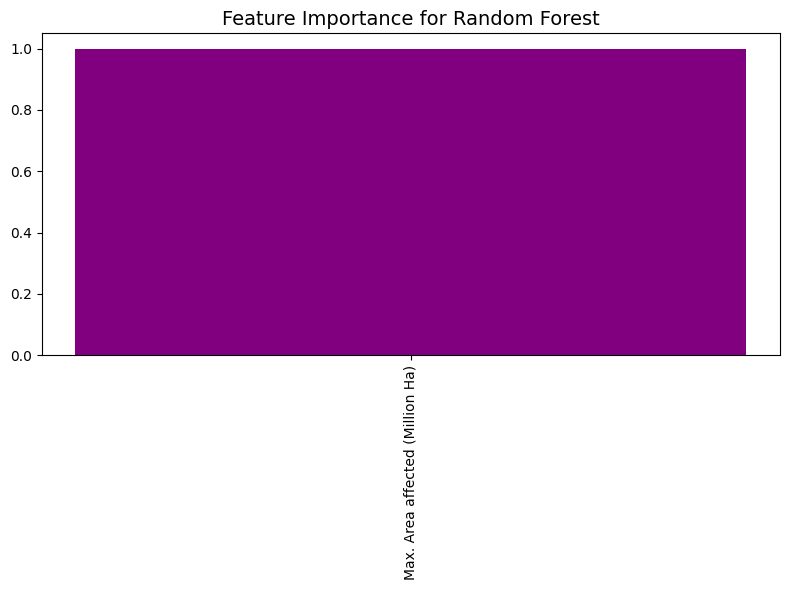

In [ ]:
import numpy as np  # Ensure numpy is imported
import matplotlib.pyplot as plt

# Assuming you have already trained your Random Forest model (rf_model)

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Plotting Feature Importance
plt.figure(figsize=(8, 6))
plt.title('Feature Importance for Random Forest', fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], color='purple', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


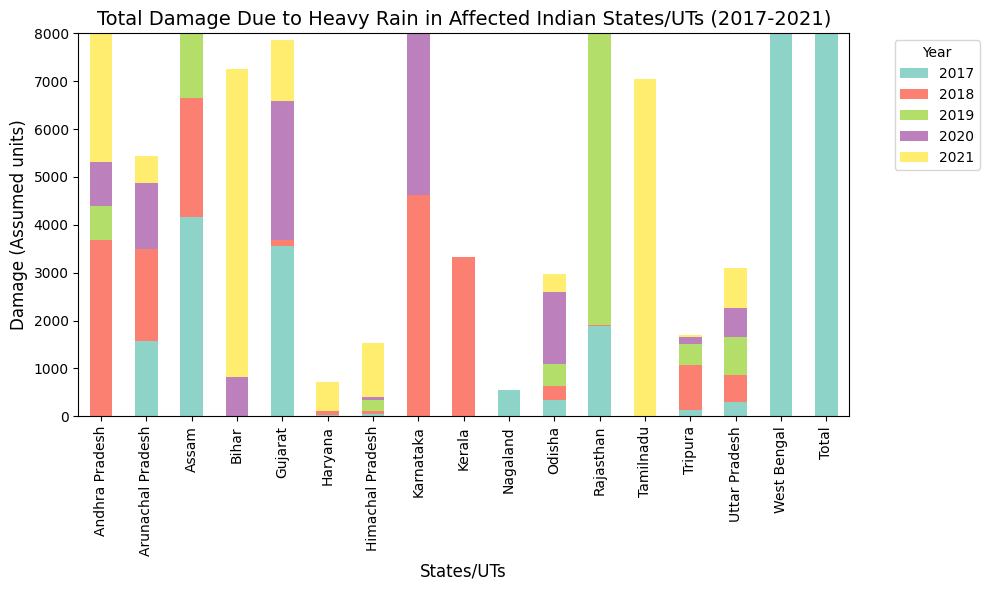

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'RS_Session_260_AU_2001_1.csv'
data = pd.read_csv(file_path)

# Drop 'Sl. No.' column
data = data.drop('Sl. No.', axis=1)

# Remove rows (states) where data for all years is missing
affected_states = data.dropna(how='all', subset=['2017', '2018', '2019', '2020', '2021'])

# Set 'States/UT' as index for better plotting
affected_states.set_index('States/UT', inplace=True)

# Filter for states where damage in at least one year is above a certain threshold
# For example, assuming 500 units as a threshold for affected states
threshold = 500
affected_states_filtered = affected_states[(affected_states > threshold).any(axis=1)]

# Plotting the total damage across years for affected states
affected_states_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Customizing the plot
plt.title('Total Damage Due to Heavy Rain in Affected Indian States/UTs (2017-2021)', fontsize=14)
plt.ylabel('Damage (Assumed units)', fontsize=12)
plt.xlabel('States/UTs', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 8000)  # Shorter y-axis scale for better visualization
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
